In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.models import model_from_json 


In [4]:
train_dir = "./archive/train" 
test_dir = "./archive/test"

In [5]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
img_size=48
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [8]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [14]:
epochs = 45
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45


/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 271s 749ms/step - accuracy: 0.1985 - loss: 2.2807 - val_accuracy: 0.2500 - val_loss: 1.8688
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 274s 762ms/step - accuracy: 0.2794 - loss: 1.8429 - val_accuracy: 0.2961 - val_loss: 1.9008
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 272s 757ms/step - accuracy: 0.3714 - loss: 1.6262 - val_accuracy: 0.3282 - val_loss: 1.8828
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 256s 712ms/step - accuracy: 0.4434 - loss: 1.4455 - val_accuracy: 0.4909 - val_loss: 1.3382
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 243s 676ms/step - accuracy: 0.4979 - loss: 1.3246 - val_accuracy: 0.5070 - val_loss: 1.3022
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 243s 676ms/step - accuracy: 0.5152 - loss: 1.2614 - val_accuracy: 0.5496 - val_loss: 1.2164
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 243s 676ms/step - accuracy: 0.5418 - loss: 1.1931 - val_accuracy: 0.5719 - val_loss: 1.1515
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 243s 677ms/step - accuracy: 0.5566 - loss: 1.15

In [19]:
model_json = model.to_json() 
with open("emotion_model_secondary.json", "w") as json_file: 
    json_file.write(model_json)

In [9]:
json_file = open('emotion_model_secondary.json', 'r') 
loaded_model_json = json_file.read() 
json_file.close() 
model = model_from_json(loaded_model_json)

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()
    
    return predicted_class


def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry', 
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }
    
    return res_dict[predicted_emotion]

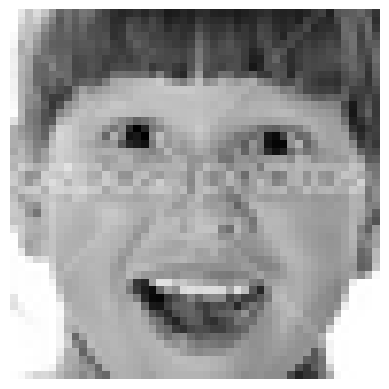

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted emotion class: happy


In [23]:
image_path = "./archive/test/happy/im30.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))

In [11]:
cap = cv2.VideoCapture(0) 
while True: 
    # Find haar cascade to draw bounding box around face 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, (1280, 720)) 
    if not ret: 
        print(ret) 
    # Create a face detector 
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

    # detect faces available on camera 
    num_faces = face_detector.detectMultiScale(gray_frame,  
                                            scaleFactor=1.3, minNeighbors=5) 

    # take each face available on the camera and Preprocess it 
    for (x, y, w, h) in num_faces: 
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4) 
        roi_gray_frame = gray_frame[y:y + h, x:x + w] 
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame,  
                                                                (48, 48)), -1), 0) 
        # predict the emotions 
        emotion_prediction = model.predict(cropped_img) 
        maxindex = int(np.argmax(emotion_prediction)) 
        cv2.putText(frame, model[maxindex], (x+5, y-20),  
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA) 

    cv2.imshow('Emotion Detection', frame) 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cap.release() 
cv2.destroyAllWindows()

# save trained model weight in .h5 file 
model.save_weights('emotion_model.h5')

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/cv2/qt/plugins"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


TypeError: 'Sequential' object is not subscriptable

: 